### Import libraries

In [56]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import scipy as loadmata

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
#from sklearn import datasets

#from nolearn.dbn import DBN

import os

from PIL import Image, ImageFilter, ImageOps, ImageEnhance


### Import project files

In [57]:
%run C:/Data/Dev/NumberRecognition/src/Shared/serviceFunc.py
%run C:/Data/Dev/NumberRecognition/src/Teaching/mnist_cnn.py

### import MNIST from local files

In [58]:
from tensorflow.contrib.learn.python.learn.datasets.mnist import extract_images, extract_labels

with open('C:/Data/Dev/NumberRecognition/assets/train-images-idx3-ubyte.gz', 'rb') as f:
  x_train = extract_images(f)
with open('C:/Data/Dev/NumberRecognition/assets/train-labels-idx1-ubyte.gz', 'rb') as f:
  y_train = extract_labels(f)
with open('C:/Data/Dev/NumberRecognition/assets/t10k-images-idx3-ubyte.gz', 'rb') as f:
  x_test = extract_images(f)
with open('C:/Data/Dev/NumberRecognition/assets/t10k-labels-idx1-ubyte.gz', 'rb') as f:
  y_test = extract_labels(f)

print ('')
print ("Number of images for training:", x_train.shape[0])
print ("Number of images used for testing:", x_test.shape[0])
pix = int(np.sqrt(x_train.shape[1]))
print ("Each image is:", pix, "by", pix, "pixels")

Extracting C:/Data/Dev/NumberRecognition/assets/train-images-idx3-ubyte.gz
Extracting C:/Data/Dev/NumberRecognition/assets/train-labels-idx1-ubyte.gz
Extracting C:/Data/Dev/NumberRecognition/assets/t10k-images-idx3-ubyte.gz
Extracting C:/Data/Dev/NumberRecognition/assets/t10k-labels-idx1-ubyte.gz

Number of images for training: 60000
Number of images used for testing: 10000
Each image is: 5 by 5 pixels


### Show first image

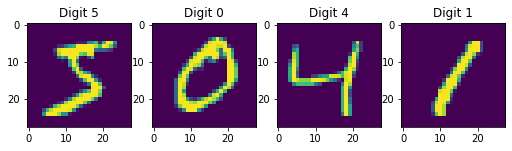

In [59]:
plt.figure(figsize=(22,22))
x, y = 10, 4

for i in range(4):
    
    label = y_train[i]
    plt.subplot(y, x, i+1).set_title('Digit {label}'.format(label=label))
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
    
plt.show()
    

### mnist_cnn.py


In [60]:
modelOutcome = teachMnistCnn()

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 311s 5ms/step - loss: 0.2639 - acc: 0.9191 - val_loss: 0.0554 - val_acc: 0.9828
Test loss: 0.05539878519605845
Test accuracy: 0.9828


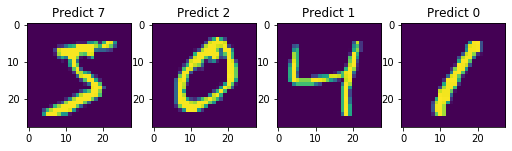

In [61]:
plt.figure(figsize=(22,22))
x, y = 10, 4

for i in range(4):

    imgArrNp = np.array(x_test[i])
    xTestReshape = imgArrNp.reshape(1,28,28,1)
    predict = modelOutcome.predict(xTestReshape)
    predictClasses = modelOutcome.predict_classes(xTestReshape)
    
    #print('[1.1] x_train',x_train.shape)
    #print('[1.2] x_train[i]',x_train[i].shape)
    #print('[1.3]', x_train[i][0][0])
    #print('[2] k',k.shape)
    #print('[3] xTestReshape',xTestReshape.shape)
    
    label = predictClasses[0] #y_train[i]
    plt.subplot(y, x, i+1).set_title('Predict {label}'.format(label=label))
    plt.imshow(x_train[i].reshape((28,28)),interpolation='nearest')
    
    #show_imgArr(x_train[i], label)
    
plt.show()

In [48]:
def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

[10 predict_classes] [9] predict [[0.06409342 0.00603982 0.1352915  0.07850897 0.11720341 0.06499787
  0.01168158 0.02410212 0.08300975 0.41507152]]


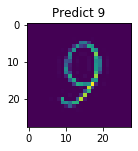

In [63]:
image_file_name = 'C:/Data/Dev/NumberRecognition/samples/9_3.png'
#show_img(image_file_name, 2)

img = Image.open(image_file_name).convert('L').resize((28,28))
#img = change_contrast(img, 0)
img = ImageOps.invert(img)

imgArr = imageprepare(image_file_name)
imgArr = np.array(imgArr)
#print('[5]', imgArr.shape)

#print('[7]',imgArr)
#imgArr = imgArr[np.newaxis, ..., np.newaxis]
#imgArr = np.expand_dims(imgArr, axis=0)
imgArrNp = np.array(imgArr)
#xTestReshape = imgArrNp.reshape(1,28,28,1)
xTestReshape = imgArrNp[np.newaxis, ..., np.newaxis]
#print('[8]',xTestReshape.shape)
#print('[9]',imgArr)


#xTestReshape = imgArr.reshape(1,28,28,1)
predict = modelOutcome.predict(xTestReshape)
predictClasses = modelOutcome.predict_classes(xTestReshape)
print('[10 predict_classes]', predictClasses, 'predict', predict)
show_imgArr(imgArr, predictClasses[0])

### Sources:
* [Build the MNIST model with your own handwritten digits using TensorFlow, Keras, and Python](https://medium.com/@ashok.tankala/build-the-mnist-model-with-your-own-handwritten-digits-using-tensorflow-keras-and-python-f8ec9f871fd3
)
* [Simple_cnn_keras_tensorflow.ipynb](https://gist.github.com/alexcpn/0683bb940cae510cf84d5976c1652abd)
* [How to Make Predictions with Keras](https://machinelearningmastery.com/how-to-make-classification-and-regression-predictions-for-deep-learning-models-in-keras/)